    La Bibliothèque quantique

Bob doit briser un sort en trouvant un rituel dans un grimoire caché dans une bibliothèque quantique. Il y a quatre grimoires, mais il ne peut en emprunter un qu'au hasard. Aïka peut aider en marquant le bon grimoire.

Pour cela, Bob utilise l'algorithme de Grover avec un dispositif spécial. Ce dispositif met tous les grimoires dans un état quantique où le grimoire correct, marqué par Aïka, se distingue. En agissant sur les quatre grimoires, le dispositif augmente les chances de choisir le bon grimoire à 100%.


Import

In [139]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_state_city
import numpy as np
import matplotlib.pyplot as plt

Représentation des grimoires par un circuit de 2 Qbits

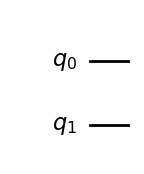

In [127]:
circ = QuantumCircuit(2)
circ.draw('mpl')

Etat initial
Au tout début, les grimoires ont la même probabilité d'être ouverts. Donc, on place des portes Hadamard sur q0 et q1.

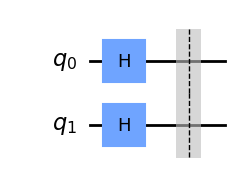

In [128]:
circ.h([0,1])
circ.barrier()
circ.draw('mpl')

Intervention d'Aïka :
Pour simuler l'intervention d'Aïka, un Oracle est nécessaire.

Supposons que le rituel est dans le grimoire 0. Pour représenter le pouvoir d'Aïka, nous avons besoin de :

- Porte Not sur q0 : Cette porte inverse l'état d'un Qbit. Si un Qbit est dans l'état 0, il passe à l'état 1, et vice versa.

- Porte CZ (Contrôle Z) sur q0 et q1 : La porte CZ utilise deux Qbits - un Qbit de contrôle et un Qbit cible. Si le Qbit de contrôle est dans l'état 1, alors une porte Z est appliquée sur le Qbit cible. La porte Z effectue une rotation de 180 degrés autour de l'axe Z, ce qui inverse la phase de l'état 1. Par exemple, elle peut transformer l'état + en l'état -. La porte CZ n'a d'effet que si les deux Qbits sont dans l'état 1.

- Une seconde porte Not sur q0 : Elle rétablit l'état original de q0 après l'action de la porte CZ.

Si le rituel était sur un autre grimoire, la représentation du pouvoir d'Aïka devrait être ajustée en conséquence. Donc pour chaque grimoire pour utiliser le pouvoir d'Aika, il faudra un circuit différent.

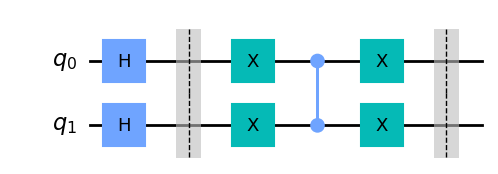

In [129]:
circ.x([0,1])
circ.cz(0,1)
circ.x([0,1])
circ.barrier(range(2))
circ.draw('mpl')

On applique un diffuseur qui permet pour un état, de se superposer sur tous les états avec la phase inversée de l'état initial

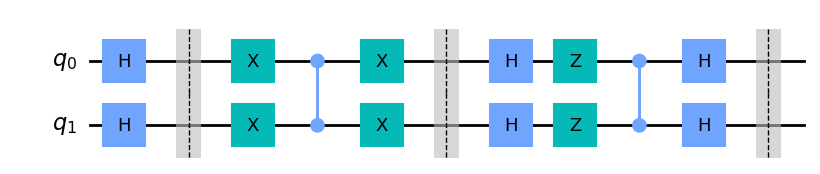

In [130]:
circ.h([0,1])
circ.z([0,1])
circ.cz(0, 1)
circ.h([0,1])

circ.barrier()
circ.draw('mpl')

Simulation

In [131]:
circ.measure_all()
backend = Aer.get_backend('statevector_simulator')
circ = transpile(circ, backend)
simulator = backend.run(circ)
result = simulator.result()
counts = result.get_counts()

Grimoire 1 - Etat 00

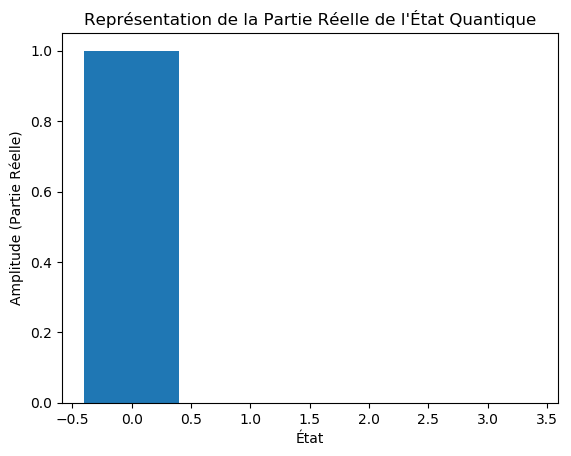

In [140]:
outputstate = result.get_statevector(circ, decimals=3)
real_part = np.real(outputstate)
plt.bar(range(len(real_part)), real_part)
plt.xlabel('État')
plt.ylabel('Amplitude (Partie Réelle)')
plt.title('Représentation de la Partie Réelle de l\'État Quantique')
plt.show()

Circuit du Grimoire 2 - Etat 01

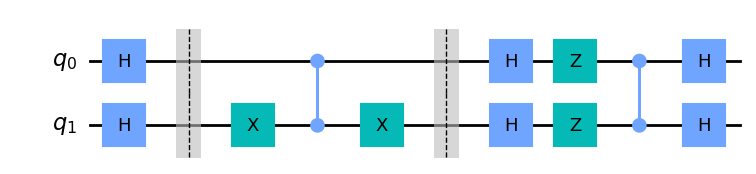

In [133]:
# Circuit de base
circ_2 = QuantumCircuit(2)
circ_2.h([0,1])
circ_2.barrier(range(2))

# Intervention d'Aïka
circ_2.x(1)
circ_2.cz(0,1)
circ_2.x(1)
circ_2.barrier(range(2))

# Diffuseur
circ_2.h([0,1])
circ_2.z([0,1])
circ_2.cz(0,1)
circ_2.h([0,1])

circ_2.draw('mpl')

Simulation Grimoire 2 - Etat 01

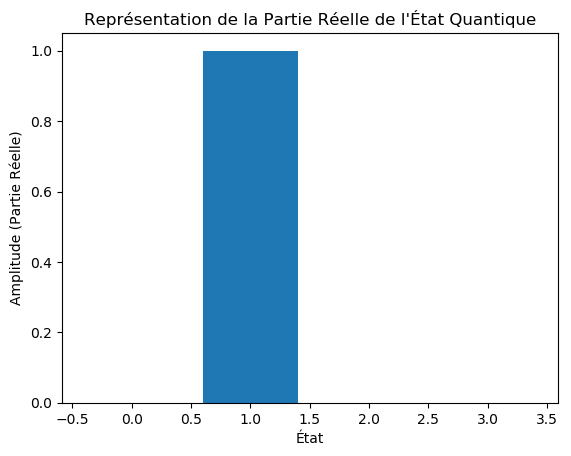

In [141]:
circ_2.measure_all()

circ_2 = transpile(circ_2, backend)
simulator_2 = backend.run(circ_2)
result_2 = simulator_2.result()
counts_2 = result_2.get_counts()
outputstate_2 = result_2.get_statevector(circ_2, decimals=3)
real_part_2 = np.real(outputstate_2)
plt.bar(range(len(real_part_2)), real_part_2)
plt.xlabel('État')
plt.ylabel('Amplitude (Partie Réelle)')
plt.title('Représentation de la Partie Réelle de l\'État Quantique')
plt.show()

Circuit du Grimoire 3 - Etat 10

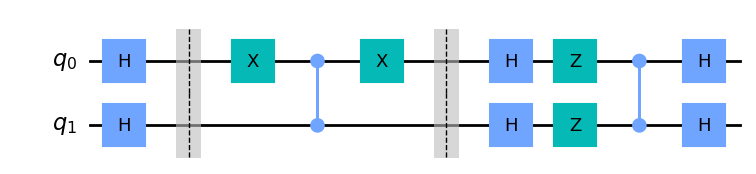

In [135]:
# Circuit de base
circ_3 = QuantumCircuit(2)
circ_3.h([0,1])
circ_3.barrier(range(2))

# Intervention d'Aïka
circ_3.x(0)
circ_3.cz(0,1)
circ_3.x(0)
circ_3.barrier(range(2))

# Diffuseur
circ_3.h([0,1])
circ_3.z([0,1])
circ_3.cz(0,1)
circ_3.h([0,1])

circ_3.draw('mpl')

Simulation du Grimoire 3 - Etat 10

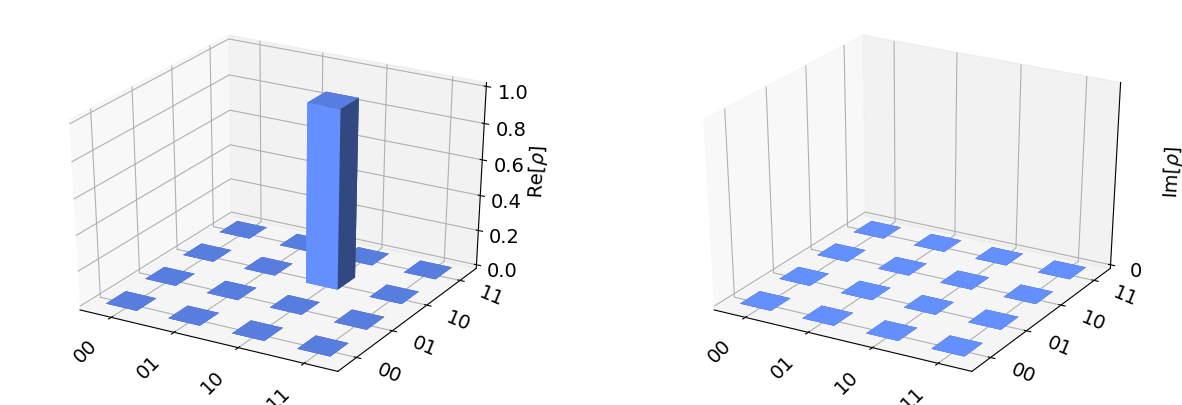

In [136]:
circ_3.measure_all()

# Simulation
circ_3 = transpile(circ_3, backend)
simulator_3 = backend.run(circ_3)
result_3 = simulator_3.result()
counts_3 = result_3.get_counts()
outputstate_3 = result_3.get_statevector(circ_3, decimals=3)
real_part_3 = np.real(outputstate_3)
plt.bar(range(len(real_part_3)), real_part_3)
plt.xlabel('État')
plt.ylabel('Amplitude (Partie Réelle)')
plt.title('Représentation de la Partie Réelle de l\'État Quantique')
plt.show()

Circuit du Grimoire 4 - Etat 11

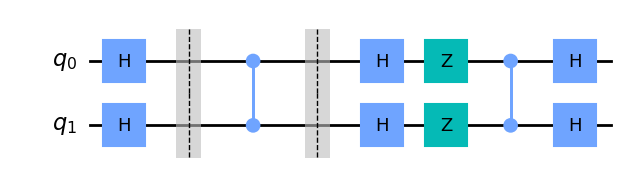

In [137]:
# Circuit de base
circ_4 = QuantumCircuit(2)
circ_4.h([0,1])
circ_4.barrier(range(2))

# Intervention d'Aïka
circ_4.cz(0,1)
circ_4.barrier(range(2))

# Diffuseur
circ_4.h([0,1])
circ_4.z([0,1])
circ_4.cz(0,1)
circ_4.h([0,1])

circ_4.draw('mpl')

Simulation du Grimoire 4 - Etat 11

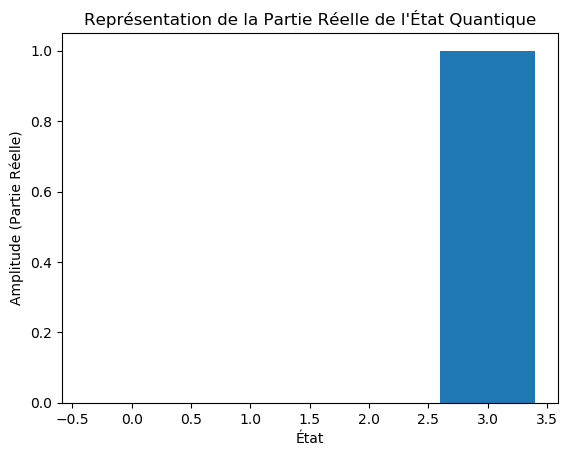

In [146]:
# Mesure du circuit
circ_4.measure_all()

# Simulation
circ_4 = transpile(circ_4, backend)
simulator_4 = backend.run(circ_4)
result_4 = simulator_4.result()
counts_4 = result_4.get_counts()

outputstate_4 = result_4.get_statevector(circ_4)
real_part_4 = np.real(outputstate_4)
plt.bar(range(len(real_part_4)), real_part_4)
plt.xlabel('État')
plt.ylabel('Amplitude (Partie Réelle)')
plt.title('Représentation de la Partie Réelle de l\'État Quantique')
plt.show()